In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#Speed up image training 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# copy all of images part 2 to content
zip_path = "/content/drive/MyDrive/HAM10000/HAM10000_images_part_2.zip"

!cp "{zip_path}" .

!unzip -q HAM10000_images_part_2.zip

!rm HAM10000_images_part_2.zip

In [ ]:
# import os
# os.chdir("/content/drive/MyDrive/HAM10000/HAM10000_images_part_2/")
# !ls -1 | wc -l

In [ ]:
# for file in os.listdir("/content/HAM10000_images_part_1"):
#   print(file)

In [ ]:
# copy all of images part 1 to content
zip_path = "/content/drive/MyDrive/HAM10000/HAM10000_images_part_1.zip"

!cp "{zip_path}" .

!unzip -q HAM10000_images_part_1.zip

!rm HAM10000_images_part_1.zip

In [ ]:
# copy all of the augmented images to content
zip_path = "/content/drive/MyDrive/HAM10000/GAN_Images_2.zip"

!cp "{zip_path}" .

!unzip -q GAN_Images_2.zip

!rm GAN_Images_2.zip

In [ ]:
import os
import pandas as pd 
import numpy as np 
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

# os.chdir("/content/drive/MyDrive/HAM10000")
# !ls

In [ ]:
#get metadata
mdata = pd.read_csv("/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv")
md = mdata


In [ ]:
# #try and balance the dataset - this idea is somewhat flawed. 
# from pandas.core.common import random_state
# from sklearn.utils import resample
# #bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6
# dx_0 = md[md['dx'] == "bkl"]
# dx_1 = md[md['dx'] == "nv"]
# dx_2 = md[md['dx'] == "df"]
# dx_3 = md[md['dx'] == "mel"]
# dx_4 = md[md['dx'] == "vasc"]
# dx_5 = md[md['dx'] == "bcc"]
# dx_6 = md[md['dx'] == "akiec"]
# #subset and random resample of data by diagnosis
# n = 1000
# dx_0_balanced = resample(dx_0, replace=True, n_samples=n, random_state=29) 
# dx_1_balanced = resample(dx_1, replace=True, n_samples=n, random_state=29) 
# dx_2_balanced = resample(dx_2, replace=True, n_samples=n, random_state=29)
# dx_3_balanced = resample(dx_3, replace=True, n_samples=n, random_state=29)
# dx_4_balanced = resample(dx_4, replace=True, n_samples=n, random_state=29)
# dx_5_balanced = resample(dx_5, replace=True, n_samples=n, random_state=29)
# dx_6_balanced = resample(dx_6, replace=True, n_samples=n, random_state=29)

In [ ]:
# mdata = pd.concat([dx_0_balanced, dx_1_balanced, dx_2_balanced, dx_3_balanced, dx_4_balanced, dx_5_balanced, dx_6_balanced])

In [ ]:
#transform the function according to the pytorch docs
from torchvision import transforms
from PIL import Image
img_size = 224
preprocess = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# preprocess2 = preprocess = transforms.Compose([
    
# ])
# input_tensor = preprocess(input_image)
# input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [ ]:
from pyparsing.helpers import identbodychars
class DermClassHelper(): 
  #make images 50 x 50 to start 
  mdata = pd.read_csv("/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv")
  IMG_SIZE = 224
  labels = {}
  img_map = {}
  #training data 
  training_data = []
  # track balance 
  balance = {}
  #relavent directories 
  sds = ["/HAM10000_images_part_1/", "/HAM10000_images_part_2/"]
  root = "/content"

  def __init__(self):
    #assign labels
    self.make_labels()
    #make the map
    self.make_image_map()
    print(self.labels, self.img_map)
  """ Assign numbers to the diagnosis types"""
  def make_labels(self):
    i = 0 
    for d in self.mdata["dx"].unique():
      self.labels[d] = i 
      i += 1
  """ Assign to each image the corresponding label """
  def make_image_map(self):
    for im, dx in zip(list(self.mdata["image_id"]), list(self.mdata["dx"])):
      self.img_map[im] = self.labels[dx]

  def make_training_data(self):
    for sd in self.sds:
      for f in tqdm(os.listdir(self.root+sd)):
        # extract the image id from the file path
        id = f.split(".")[0].strip(" ").split(" ")[0]
        if id in self.img_map: 
          if self.img_map[id] not in self.balance:
            self.balance[self.img_map[id]] = 0
          self.balance[self.img_map[id]] += 1
    print(self.balance)

In [ ]:
dch = DermClassHelper()
dch.make_training_data()
print(dch.balance)

{'bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6} {'ISIC_0027419': 0, 'ISIC_0025030': 0, 'ISIC_0026769': 0, 'ISIC_0025661': 0, 'ISIC_0031633': 0, 'ISIC_0027850': 0, 'ISIC_0029176': 0, 'ISIC_0029068': 0, 'ISIC_0025837': 0, 'ISIC_0025209': 0, 'ISIC_0025276': 0, 'ISIC_0029396': 0, 'ISIC_0025984': 0, 'ISIC_0025767': 0, 'ISIC_0032417': 0, 'ISIC_0031326': 0, 'ISIC_0025915': 0, 'ISIC_0031029': 0, 'ISIC_0029836': 0, 'ISIC_0032129': 0, 'ISIC_0032343': 0, 'ISIC_0025033': 0, 'ISIC_0027310': 0, 'ISIC_0032128': 0, 'ISIC_0025937': 0, 'ISIC_0027828': 0, 'ISIC_0029291': 0, 'ISIC_0030698': 0, 'ISIC_0025567': 0, 'ISIC_0031753': 0, 'ISIC_0026835': 0, 'ISIC_0031159': 0, 'ISIC_0031017': 0, 'ISIC_0024981': 0, 'ISIC_0027815': 0, 'ISIC_0024324': 0, 'ISIC_0029559': 0, 'ISIC_0030661': 0, 'ISIC_0027053': 0, 'ISIC_0028560': 0, 'ISIC_0031650': 0, 'ISIC_0029161': 0, 'ISIC_0026273': 0, 'ISIC_0025076': 0, 'ISIC_0029687': 0, 'ISIC_0025642': 0, 'ISIC_0025819': 0, 'ISIC_0032013': 0, 'ISIC_0031691':

100%|██████████| 5015/5015 [00:00<00:00, 650073.70it/s]

{1: 6705, 0: 1099, 5: 514, 3: 1113, 2: 115, 6: 327, 4: 142}
{1: 6705, 0: 1099, 5: 514, 3: 1113, 2: 115, 6: 327, 4: 142}


In [ ]:
from skimage import io

In [ ]:
#write a different data loader class 
from torch.utils.data import DataLoader
class DermClass():
  def __init__(self, helper, csv_file, root_dir, sds, transform1=None):
    self.derm_frame = pd.read_csv(csv_file)
    # self.derm_frame = mdata
    self.root_dir = root_dir
    self.sds = sds 
    self.transform1 = transform1
    #pass in derm class helper here
    self.helper = helper

  def __len__(self):
    return len(self.derm_frame)

  def __getitem__(self, index):
    #1 is the image file col 
    filename = self.derm_frame.iloc[index, 1]
    img_path = None
    #find the image path  
    if os.path.exists(str(self.root_dir+self.sds[0]+filename+".jpg")):
      img_path = str(self.root_dir+self.sds[0]+filename+".jpg")
    elif os.path.exists(str(self.root_dir+self.sds[1]+filename+".jpg")):
      img_path = str(self.root_dir+self.sds[1]+filename+".jpg")

    #get the image using PIL 
    img = Image.open(img_path)
    # y_label = torch.tensor(np.eye(len(self.helper.labels))[self.helper.img_map[filename]]) #this is good for adam optim 
    y_label = torch.tensor(int(self.helper.img_map[filename]))

    if self.transform1: 
      image = self.transform1(img)
    return (image, y_label, filename)

In [ ]:
class GANDermClass():
  def __init__(self, csv_file, root_dir, sd, transform1=None):
    self.derm_frame = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.sd = sd
    self.transform1 = transform1
  def __len__(self):
    return len(self.derm_frame)

  def __getitem__(self, index):
    #1 is the image file col 
    filename = self.derm_frame.iloc[index]["image_id"]
    c = self.derm_frame.iloc[index]["dx"]
    img_path = None
    #find the image path  
    if os.path.exists(str(self.root_dir+self.sd+filename)):
      img_path = str(self.root_dir+self.sd+filename)
    else:
      print("Doesn't exist", str(self.root_dir+self.sd+filename))
    #get the image using PIL 
    img = Image.open(img_path)
    # y_label = torch.tensor(np.eye(len(self.helper.labels))[self.helper.img_map[filename]]) #this is good for adam optim 
    y_label = torch.tensor(int(c))

    if self.transform1: 
      image = self.transform1(img)
    return (image, y_label, filename)

In [ ]:
#  i = 0
#  for f in tqdm(os.listdir("/content/GAN_Images_2/")):
#    print(i)
#    i += 1

In [ ]:

# gan_dataset = GANDermClass(csv_file="/content/drive/MyDrive/HAM10000/HAM10000_GAN_data_2.csv", root_dir="/content", sd= "/GAN_Images_2/", transform1=preprocess)
# gan_dataset.__getitem__(5060)


In [ ]:
#hyperparams
in_channel = 3
num_classes = 7
learning_rate = 1e-3
batch_size = 64
num_epochs =35 #20 works well - it seems as tho it is a local min 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
dataset = DermClass(helper=dch, csv_file="/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv", root_dir="/content", sds=["/HAM10000_images_part_1/", "/HAM10000_images_part_2/"], transform1=preprocess)

In [ ]:
#here, we need to find a way to add augmented images to training and exclude them from testing 
train_set, test_set = torch.utils.data.random_split(dataset, [int(len(dataset)*.8), int(len(dataset)*.2)])

In [ ]:
p = .5
preprocess_gan = transforms.Compose([
    transforms.RandomRotation((45,315)),
    transforms.RandomAutocontrast(p=p),    
    transforms.ColorJitter(brightness=.3, contrast=.3),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5), 
    transforms.RandomSolarize(.1, p=p),
    transforms.RandomInvert(p=p), 
    transforms.RandomAdjustSharpness(2, p=p),
    # transfomrs.RandAugment()
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

# preprocess_gan = transforms.Compose([
#     transforms.RandAugment(7, 5),
#     transforms.Resize((img_size, img_size)),
#     transforms.ToTensor(),
# ])

In [ ]:
#here we don't need to worry about repeats
gan_dataset = GANDermClass(csv_file="/content/drive/MyDrive/HAM10000/HAM10000_GAN_data_2.csv", root_dir="/content", sd= "/GAN_Images_2/", transform1=preprocess_gan)

In [ ]:
# add the augmented data to the train set
train_set = torch.utils.data.ConcatDataset([train_set, gan_dataset])


train_loader = DataLoader(dataset = train_set, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_set, batch_size = batch_size, shuffle=True)

In [ ]:
len(train_loader)

220

In [ ]:
# dataset.__getitem__(0)

In [155]:
#import pretrained 
import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18',  pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [156]:
#we can also set the first, say, n layers to be frozen, and leave the remaining layers unfrozen, as follows 

thresh = 6
ct = 0
#here we freeze up to and including the 6th layer
for child in model.children():
  if ct <= thresh:
    for param in child.parameters():
        param.requires_grad = False
  print(child, ct)
  ct += 1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) 0
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) 1
ReLU(inplace=True) 2
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False) 3
Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine

In [157]:
# #fine tuning - set all of the model gradients to false
# for param in model.parameters():
#   param.requires_grad = False

#change the model architecture a bit
model.fc = nn.Sequential(nn.Linear(2048, 100), 
                         nn.ReLU(), 
                         nn.Dropout(p=.5), 
                         nn.Linear(100,7))
model
#might need to add the embedding for sex here
 
#change mode and put on device
# model.eval()
model.train()
model.to(device)

#example of how to add layers, where net_add is basically the new network that we are interested in: https://discuss.pytorch.org/t/add-layers-on-pretrained-model/88760
# net_add=net()
# model = nn.Sequential(resnet50, net_add)
# model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [158]:
# Check accuracy on training to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    correct = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
    total = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
    with torch.no_grad():
        for x, y, name in tqdm(loader):
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            for i,j in zip(predictions, y):
              if i.item() == j.item():
                correct[i.item()] +=1
              total[j.item()] += 1
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(
              f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}"
          )
        acc = num_correct/num_samples
        #find the accuracies for each class 
        return acc, correct, total

    model.train()

In [159]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

def make_confusion(test_loader, model):
  y_pred = []
  y_true = []
  model.eval()
  # iterate over test data
  for inputs, labels, name in tqdm(test_loader):
          inputs = inputs.to(device=device)
          labels = labels.to(device=device)

          output = model(inputs) # Feed Network
          output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
          
          y_pred.extend(output) # Save Prediction
          labels = labels.data.cpu().numpy()
          y_true.extend(labels) # Save Truth
  # constant for classes
  # bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6
  classes = ["bkl", "nv", "df", "mel", "vasc", "bcc", "akiec"]

  # Build confusion matrix
  cm = confusion_matrix(y_true, y_pred, normalize='true')
  df_cm = pd.DataFrame(cm, index = [i for i in classes],
                      columns = [i for i in classes])
  plt.figure(figsize = (12,7))
  sn.heatmap(df_cm, annot=True)
  plt.savefig('/content/drive/MyDrive/HAM10000/confusion_matrices/confusion_resnet101_GA.png')


In [160]:
#here are our metrics to track the best model accuracy 
best_acc = 0
best_acc_classes = {}

220it [03:50,  1.05s/it]


Cost at epoch 0 is 1.1792694980447942


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.7888, device='cuda:0')


220it [03:49,  1.04s/it]


Cost at epoch 1 is 0.9605765646154231


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


Got 1611 / 2003 with accuracy 80.43
for class 0, the accuracy is: 0.557604
for class 1, the accuracy is: 0.974905
for class 2, the accuracy is: 0.000000
for class 3, the accuracy is: 0.366667
for class 4, the accuracy is: 0.535714
for class 5, the accuracy is: 0.639175
for class 6, the accuracy is: 0.518072


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8043, device='cuda:0')


220it [03:47,  1.03s/it]


Cost at epoch 2 is 0.8697393002835188


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8023, device='cuda:0')


220it [03:46,  1.03s/it]


Cost at epoch 3 is 0.80265666666356


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


Got 1635 / 2003 with accuracy 81.63
for class 0, the accuracy is: 0.571429
for class 1, the accuracy is: 0.946008
for class 2, the accuracy is: 0.173913
for class 3, the accuracy is: 0.512500
for class 4, the accuracy is: 0.892857
for class 5, the accuracy is: 0.701031
for class 6, the accuracy is: 0.566265


100%|██████████| 32/32 [00:33<00:00,  1.05s/it]


tensor(0.8163, device='cuda:0')


220it [03:46,  1.03s/it]


Cost at epoch 4 is 0.7723252582279119


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


Got 1647 / 2003 with accuracy 82.23
for class 0, the accuracy is: 0.705069
for class 1, the accuracy is: 0.933840
for class 2, the accuracy is: 0.130435
for class 3, the accuracy is: 0.591667
for class 4, the accuracy is: 0.750000
for class 5, the accuracy is: 0.453608
for class 6, the accuracy is: 0.674699


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8223, device='cuda:0')


220it [03:46,  1.03s/it]


Cost at epoch 5 is 0.752526180581613


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8018, device='cuda:0')


220it [03:46,  1.03s/it]


Cost at epoch 6 is 0.735451990230517


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


Got 1650 / 2003 with accuracy 82.38
for class 0, the accuracy is: 0.663594
for class 1, the accuracy is: 0.977186
for class 2, the accuracy is: 0.260870
for class 3, the accuracy is: 0.450000
for class 4, the accuracy is: 0.821429
for class 5, the accuracy is: 0.257732
for class 6, the accuracy is: 0.710843


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8238, device='cuda:0')


220it [03:45,  1.03s/it]


Cost at epoch 7 is 0.6656031871383841


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


Got 1659 / 2003 with accuracy 82.83
for class 0, the accuracy is: 0.548387
for class 1, the accuracy is: 0.975665
for class 2, the accuracy is: 0.086957
for class 3, the accuracy is: 0.479167
for class 4, the accuracy is: 0.892857
for class 5, the accuracy is: 0.690722
for class 6, the accuracy is: 0.578313


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8283, device='cuda:0')


220it [03:45,  1.03s/it]


Cost at epoch 8 is 0.590965018353679


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


Got 1663 / 2003 with accuracy 83.03
for class 0, the accuracy is: 0.649770
for class 1, the accuracy is: 0.971103
for class 2, the accuracy is: 0.391304
for class 3, the accuracy is: 0.604167
for class 4, the accuracy is: 0.928571
for class 5, the accuracy is: 0.247423
for class 6, the accuracy is: 0.493976


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8303, device='cuda:0')


220it [03:45,  1.03s/it]


Cost at epoch 9 is 0.5740045100450516


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8263, device='cuda:0')


220it [03:45,  1.03s/it]


Cost at epoch 10 is 0.6071659085425464


100%|██████████| 32/32 [00:32<00:00,  1.00s/it]


tensor(0.8278, device='cuda:0')


220it [03:44,  1.02s/it]


Cost at epoch 11 is 0.5465885323556987


100%|██████████| 32/32 [00:33<00:00,  1.04s/it]


Got 1676 / 2003 with accuracy 83.67
for class 0, the accuracy is: 0.686636
for class 1, the accuracy is: 0.966540
for class 2, the accuracy is: 0.391304
for class 3, the accuracy is: 0.575000
for class 4, the accuracy is: 0.821429
for class 5, the accuracy is: 0.525773
for class 6, the accuracy is: 0.421687


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.8367, device='cuda:0')


220it [03:45,  1.03s/it]


Cost at epoch 12 is 0.5380646239627491


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


Got 1686 / 2003 with accuracy 84.17
for class 0, the accuracy is: 0.608295
for class 1, the accuracy is: 0.955894
for class 2, the accuracy is: 0.652174
for class 3, the accuracy is: 0.600000
for class 4, the accuracy is: 0.928571
for class 5, the accuracy is: 0.680412
for class 6, the accuracy is: 0.554217


100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


tensor(0.8417, device='cuda:0')


220it [03:45,  1.03s/it]


Cost at epoch 13 is 0.509752294421196


100%|██████████| 32/32 [00:31<00:00,  1.03it/s]


tensor(0.8392, device='cuda:0')


220it [03:44,  1.02s/it]


Cost at epoch 14 is 0.5045553880659017


100%|██████████| 32/32 [00:33<00:00,  1.05s/it]


tensor(0.8308, device='cuda:0')


220it [03:44,  1.02s/it]


Cost at epoch 15 is 0.5250773245638067


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8407, device='cuda:0')


220it [03:45,  1.02s/it]


Cost at epoch 16 is 0.5145422178235921


100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


tensor(0.8397, device='cuda:0')


220it [03:44,  1.02s/it]


Cost at epoch 17 is 0.48009900335561145


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


Got 1689 / 2003 with accuracy 84.32
for class 0, the accuracy is: 0.658986
for class 1, the accuracy is: 0.953612
for class 2, the accuracy is: 0.478261
for class 3, the accuracy is: 0.525000
for class 4, the accuracy is: 0.892857
for class 5, the accuracy is: 0.783505
for class 6, the accuracy is: 0.650602


100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


tensor(0.8432, device='cuda:0')


220it [03:44,  1.02s/it]


Cost at epoch 18 is 0.4628486046059565


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


Got 1695 / 2003 with accuracy 84.62
for class 0, the accuracy is: 0.700461
for class 1, the accuracy is: 0.963498
for class 2, the accuracy is: 0.521739
for class 3, the accuracy is: 0.504167
for class 4, the accuracy is: 0.892857
for class 5, the accuracy is: 0.762887
for class 6, the accuracy is: 0.530120


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8462, device='cuda:0')


220it [03:45,  1.02s/it]


Cost at epoch 19 is 0.4487978481433608


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8397, device='cuda:0')


220it [03:46,  1.03s/it]


Cost at epoch 20 is 0.4815479408610951


100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


tensor(0.8337, device='cuda:0')


220it [03:42,  1.01s/it]


Cost at epoch 21 is 0.47255272472446613


100%|██████████| 32/32 [00:30<00:00,  1.03it/s]


tensor(0.8248, device='cuda:0')


220it [03:39,  1.00it/s]


Cost at epoch 22 is 0.4382207755338062


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8183, device='cuda:0')


220it [03:38,  1.01it/s]


Cost at epoch 23 is 0.4513510486619039


100%|██████████| 32/32 [00:30<00:00,  1.05it/s]


tensor(0.8422, device='cuda:0')


220it [03:39,  1.00it/s]


Cost at epoch 24 is 0.4508611952716654


100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


tensor(0.8063, device='cuda:0')


220it [03:39,  1.00it/s]


Cost at epoch 25 is 0.47808339697393504


100%|██████████| 32/32 [00:30<00:00,  1.03it/s]


tensor(0.8238, device='cuda:0')


220it [03:38,  1.01it/s]


Cost at epoch 26 is 0.44785608412189915


100%|██████████| 32/32 [00:30<00:00,  1.04it/s]


tensor(0.8412, device='cuda:0')


220it [03:38,  1.01it/s]


Cost at epoch 27 is 0.4194615195420655


100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


tensor(0.8437, device='cuda:0')


220it [03:39,  1.00it/s]


Cost at epoch 28 is 0.41589060866019945


100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


tensor(0.8412, device='cuda:0')


220it [03:39,  1.00it/s]


Cost at epoch 29 is 0.4060611429539594


100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


tensor(0.8397, device='cuda:0')


220it [03:38,  1.01it/s]


Cost at epoch 30 is 0.40237483436411076


100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


tensor(0.8402, device='cuda:0')


220it [03:38,  1.01it/s]


Cost at epoch 31 is 0.37601719112558796


100%|██████████| 32/32 [00:30<00:00,  1.05it/s]


tensor(0.8357, device='cuda:0')


220it [03:39,  1.00it/s]


Cost at epoch 32 is 0.3704932973804799


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.8233, device='cuda:0')


220it [03:39,  1.00it/s]


Cost at epoch 33 is 0.3841415472328663


100%|██████████| 32/32 [00:30<00:00,  1.05it/s]


tensor(0.8308, device='cuda:0')


220it [03:39,  1.00it/s]


Cost at epoch 34 is 0.40029433562674305


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8208, device='cuda:0')


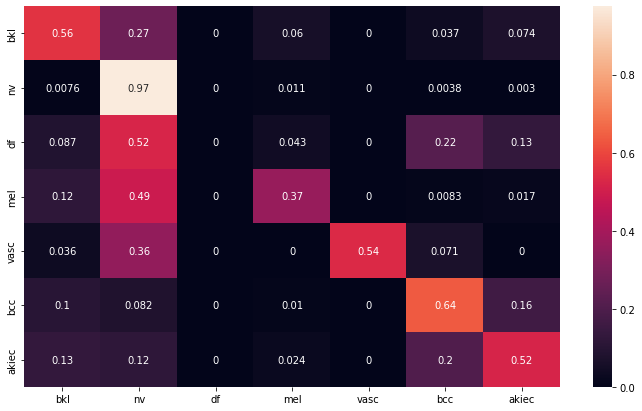

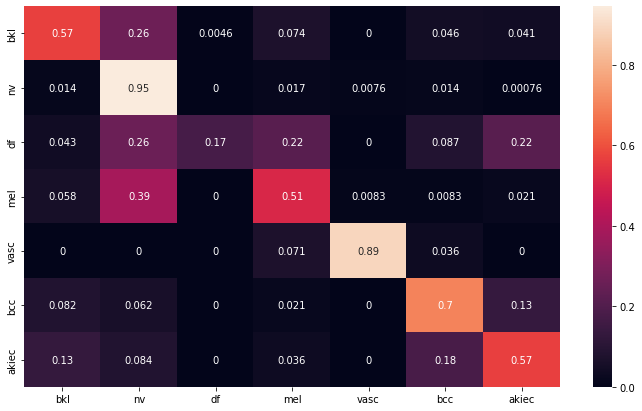

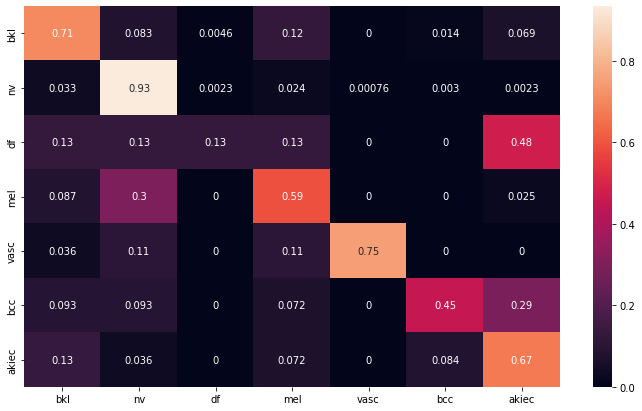

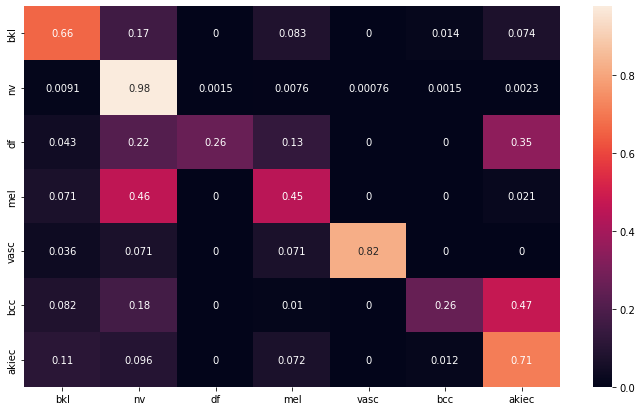

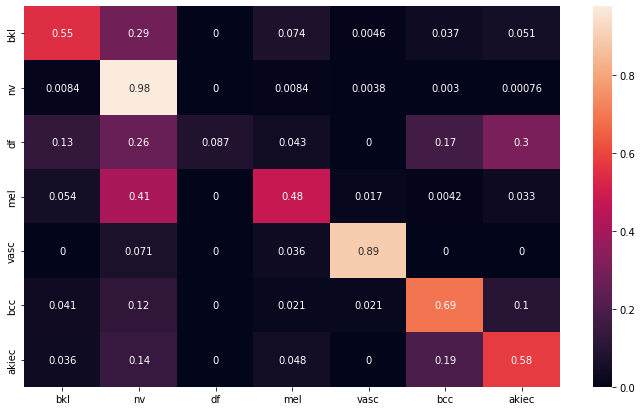

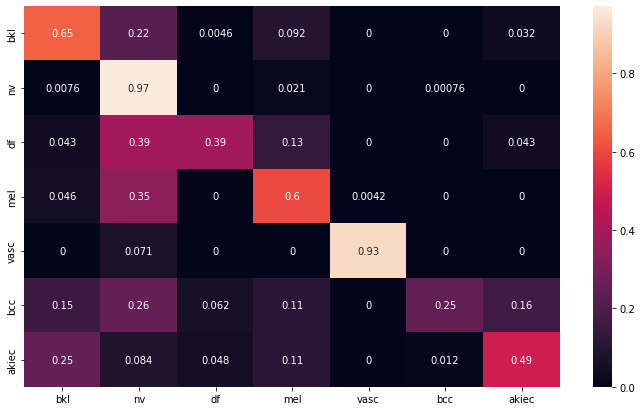

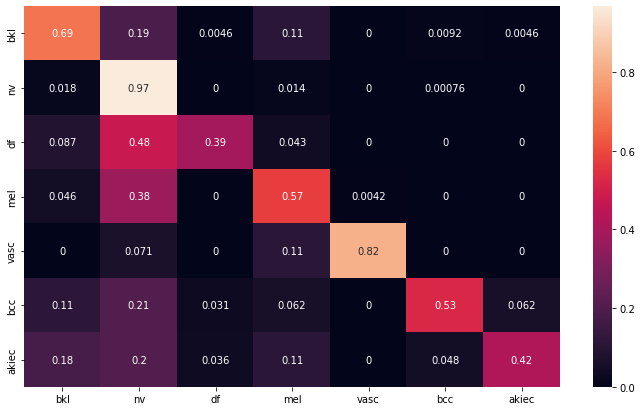

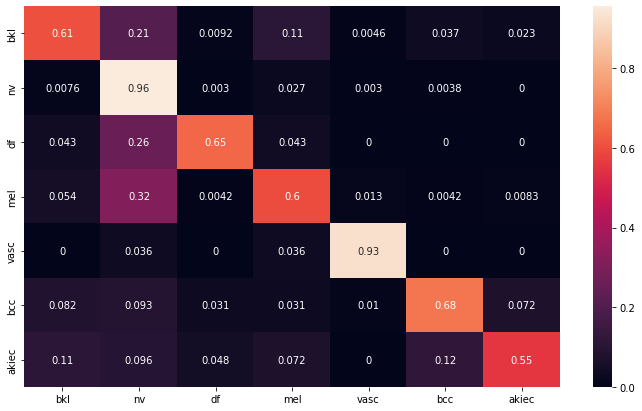

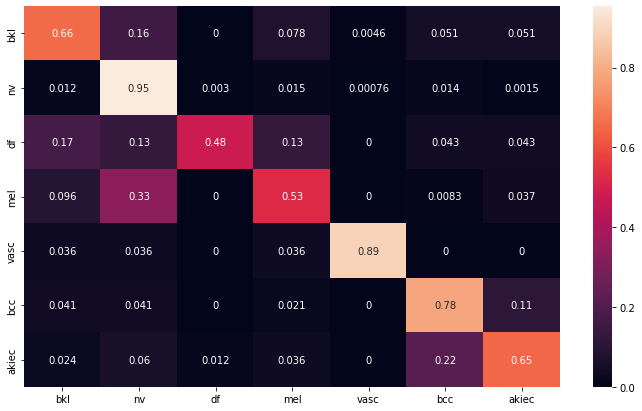

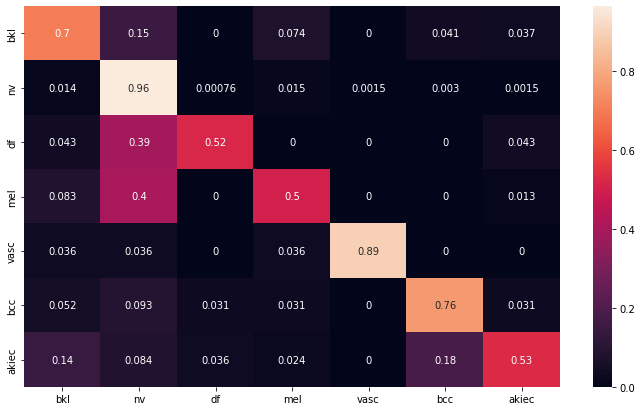

In [161]:
# Loss and optimizer
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.

# from focal_loss.focal_loss import FocalLoss
# import torchgeometry as tgm



criterion = nn.CrossEntropyLoss()
# criterion = tgm.losses.FocalLoss(alpha=0.5, gamma=2.0, reduction='mean') #experimenting with focal loss 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=.1, patience=5, verbose=True)

#arrays to track the training loss and validation loss 
training_loss = []
validation_loss = []
test_acc = []

# Train Network
for epoch in range(num_epochs):
    losses = []
    num_correct = 0
    num_samples = 0
    
    #train part 
    for batch_idx, (data, targets, names) in tqdm(enumerate(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        # forward
        scores = model(data)
        loss = criterion(scores, targets)

        losses.append(loss.item())

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()
    mean_loss = sum(losses)/len(losses)
    training_loss.append(mean_loss)
    scheduler.step(mean_loss)

    print(f"Cost at epoch {epoch} is {sum(losses)/len(losses)}")
    #test the test loss after each epoch 
    test_losses = []
    #model in test mode 
    model.eval()
    with torch.no_grad():
        #get the accuracy
        acc = 0
        for x, y, name in tqdm(test_loader): # 1st loop 
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            #find the test loss
            loss = criterion(scores, y)
            test_losses.append(loss.item())

            #find the test accuracy 
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

            #get the accuracy here
            acc = num_correct/num_samples
        #if acc is > best acc
        if acc > best_acc:
          best_acc = acc 
          if acc > .80:
            #get the individual accuracies
            _,correct, total = check_accuracy(test_loader, model) #2nd loop 
            for k in correct:
              best_acc_classes[k] = correct[k]/total[k]
              print("for class %d, the accuracy is: %f" %(k, correct[k]/total[k]))
            #save the confusion matrix
            make_confusion(test_loader, model) # 3rd loop 

    mean_test_loss = sum(test_losses)/len(test_losses)
    validation_loss.append(mean_test_loss)

   # test the test accuracy 
    acc = num_correct/num_samples
    print(acc)
    test_acc.append(acc.item())
    #put the model back in train mode
    model.train()




In [162]:
training_loss, validation_loss

([1.1792694980447942,
  0.9605765646154231,
  0.8697393002835188,
  0.80265666666356,
  0.7723252582279119,
  0.752526180581613,
  0.735451990230517,
  0.6656031871383841,
  0.590965018353679,
  0.5740045100450516,
  0.6071659085425464,
  0.5465885323556987,
  0.5380646239627491,
  0.509752294421196,
  0.5045553880659017,
  0.5250773245638067,
  0.5145422178235921,
  0.48009900335561145,
  0.4628486046059565,
  0.4487978481433608,
  0.4815479408610951,
  0.47255272472446613,
  0.4382207755338062,
  0.4513510486619039,
  0.4508611952716654,
  0.47808339697393504,
  0.44785608412189915,
  0.4194615195420655,
  0.41589060866019945,
  0.4060611429539594,
  0.40237483436411076,
  0.37601719112558796,
  0.3704932973804799,
  0.3841415472328663,
  0.40029433562674305],
 [0.6374510554596782,
  0.5701740588992834,
  0.58796854224056,
  0.5614991094917059,
  0.5387777723371983,
  0.6311234286986291,
  0.6715324819087982,
  0.6836699219420552,
  0.8253310490399599,
  1.0840075588785112,
  0.80211

In [163]:
# torch.save(model.state_dict(), "/content/drive/MyDrive/HAM10000/models/resnet101tlaug.pt")

In [164]:
for i in range(len(test_acc)):
  test_acc[i] =  test_acc[i]

In [165]:
test_acc

[0.7888167500495911,
 0.8042935729026794,
 0.8022965788841248,
 0.8162755966186523,
 0.8222665786743164,
 0.8017973303794861,
 0.8237643837928772,
 0.8282576203346252,
 0.8302546143531799,
 0.8262606263160706,
 0.8277583718299866,
 0.8367449045181274,
 0.8417373895645142,
 0.8392411470413208,
 0.8307538628578186,
 0.8407388925552368,
 0.8397403955459595,
 0.8432351350784302,
 0.8462306261062622,
 0.8397403955459595,
 0.8337493538856506,
 0.8247628808021545,
 0.818272590637207,
 0.8422366380691528,
 0.8062905669212341,
 0.8237643837928772,
 0.8412381410598755,
 0.8437343835830688,
 0.8412381410598755,
 0.8397403955459595,
 0.8402396440505981,
 0.8357464075088501,
 0.8232650756835938,
 0.8307538628578186,
 0.8207688331604004]

# Graphics/Stats

In [166]:
import matplotlib.pyplot as plt
from numpy import arange


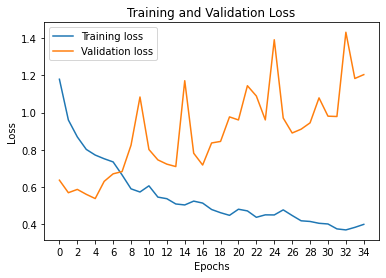

<Figure size 432x288 with 0 Axes>

In [167]:
plt.plot([i for i in range(num_epochs)], training_loss, label="Training loss")
plt.plot([i for i in range(num_epochs)], validation_loss, label="Validation loss")
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.xticks(arange(0, num_epochs, 2))

# Display the plot
plt.legend(loc='best')
plt.show()
plt.savefig('training_progress.png')